In [ ]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.shape

(114000, 21)

In [ ]:
print(df.isnull().sum())

df = df.dropna(subset=['artists', 'album_name', 'track_name'])

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
df.dropna()
df.shape

(113999, 21)

T-stat: 4.709907046461422
P-value: 2.481210973442887e-06
Reject null hypothesis: The mode has a significant impact on the popularity of the song.


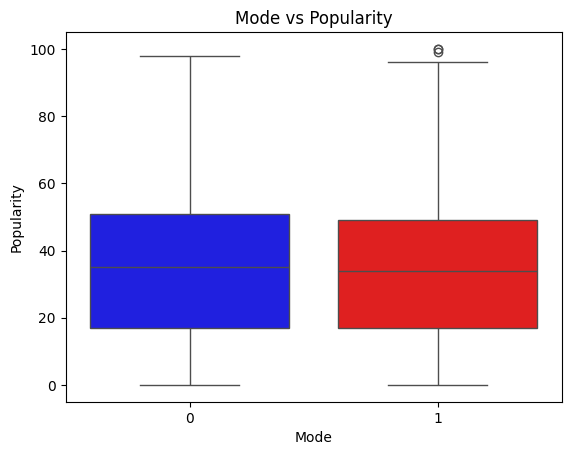

In [ ]:
mode_zero = df[df['mode'] == 0]['popularity']
mode_one = df[df['mode'] == 1]['popularity']

t, p = stats.ttest_ind(mode_zero, mode_one)

print(f"T-stat: {t}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The mode has a significant impact on the popularity of the song.")
else:
    print("Fail to reject null hypothesis: The mode does not have a significant impact on the popularity of the song.")

sns.boxplot(x='mode', y='popularity', data=df, hue='mode', palette=["blue", "red"], legend=False)
plt.title(f'Mode vs Popularity')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.show()


Chi-Square Statistic: 18460.017016084603
P-value: 0.0
Reject null hypothesis: The genre has a significant impact on the explicitness of the song.


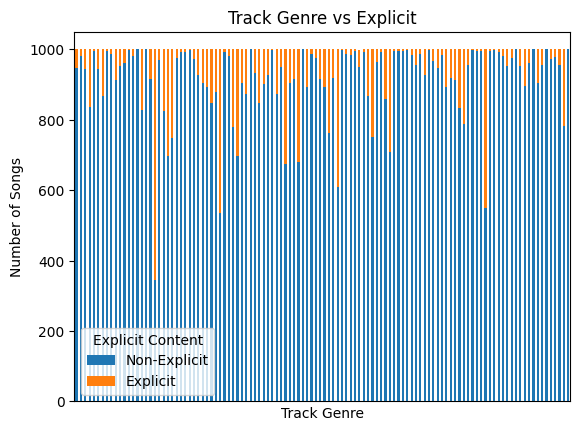

In [ ]:
table = pd.crosstab(df['track_genre'], df['explicit'])

chi_square, p, dof, expected = stats.chi2_contingency(table)

print(f"Chi-Square Statistic: {chi_square}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The genre has a significant impact on the explicitness of the song.")
else:
    print("Fail to reject null hypothesis: The genre does not have a significant impact on the explicitness of the song.")

table.plot(kind='bar', stacked=True)
plt.title('Track Genre vs Explicit')
plt.xlabel('Track Genre')
plt.ylabel('Number of Songs')
plt.xticks([])
plt.legend(['Non-Explicit', 'Explicit'], title='Explicit Content')
plt.show()


Correlation coefficient: 0.03544354596134703
P-value: 5.0602553121365247e-33
Reject null hypothesis: The danceability has a significant impact on the popularity of the song.


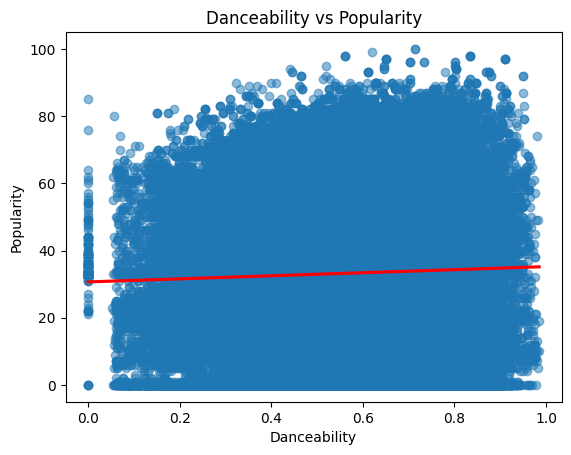

In [ ]:
corr, p = pearsonr(df['danceability'], df['popularity'])

print(f"Correlation coefficient: {corr}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis: The danceability has a significant impact on the popularity of the song.")
else:
    print("Fail to reject null hypothesis: The danceability does not have a significant impact on the popularity of the song.")

sns.regplot(x='danceability', y='popularity', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title(f'Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()